In [1]:
import random
%load_ext autoreload
%autoreload 2

In [23]:
import pandas as pd

from simulator.person import person

In [2]:
agent = person.Person()
agent.DNA

{'AGE_DEAD': 94,
 'AGE_BORN_CHILD': [32, 35, 37, 39, 40, 47],
 'INVEST': False,
 'SAVE_MONEY': True,
 'CREDIT': False,
 'SEX': 'F',
 'MARRIAGE': False,
 'STUDY': 'Ensino básico'}

In [3]:
for _ in range(100):
    agent.age += 1
    agent.studing_state()
    print(f"Is studing {agent.is_studing}")
    agent.working_state()
    print(f"Is working {agent.is_working}")
    agent.get_salary()
    agent.pay_for_living()
    agent.life_state()

Is studing False
Is working False
Is studing False
Is working False
Is studing False
Is working False
Is studing False
Is working False
Is studing False
Is working False
Is studing True
Is working False
Is studing True
Is working False
Is studing True
Is working False
Is studing True
Is working False
Is studing True
Is working False
Is studing True
Is working False
Is studing True
Is working False
Is studing True
Is working False
Is studing True
Is working False
Is studing False
Is working True
Is studing False
Is working True
Is studing False
Is working True
Is studing False
Is working True
Is studing False
Is working True
Is studing False
Is working True
Is studing False
Is working True
Is studing False
Is working True
Is studing False
Is working True
Is studing False
Is working True
Is studing False
Is working True
Is studing False
Is working True
Is studing False
Is working True
Is studing False
Is working True
Is studing False
Is working True
Is studing False
Is working True
Is st

In [4]:
agent.is_studing

False

In [55]:
import pandas as pd

from simulator.person import person
from simulator.person.constants import AGE_DEAD, AGE_BORN_CHILD, INVEST, SAVE_MONEY, CREDIT, SEX, MARRIAGE, STUDY
from simulator.state import state

In [74]:
dead_peaple = []
simulation_data = {
    'population_size': [],
    'year':[]
}
people = []
for _ in range(1_000):
    people.append(person.Person())
country = state.State()
for year in range(10_000):
    print(f"Year: {year}")
    simulation_data['population_size'].append(len(people))
    simulation_data['year'].append(year)
    for p in people:
        p.age += 1
        p.studing_state()
        p.working_state()
        p.get_salary()
        p.pay_for_living()
        p.pay_health()
        p.life_state()

        country.marry_people(person=p, population=people)

        child = p.give_birth()
        if child:
            people.append(child)
        if p.is_alive == False:
            people.remove(p)
            dead_peaple.append(p)




Year: 0
Year: 1
Year: 2
Year: 3
Year: 4
Year: 5
Year: 6
Year: 7
Year: 8
Year: 9
Year: 10
Year: 11
Year: 12
Year: 13
Year: 14
Year: 15
Year: 16
Year: 17
Year: 18
Year: 19
Year: 20
Year: 21
Year: 22
Year: 23
Year: 24
Year: 25
Year: 26
Year: 27
Year: 28
Year: 29
Year: 30
Year: 31
Year: 32
Year: 33
Year: 34
Year: 35
Year: 36
Year: 37
Year: 38
Year: 39
Year: 40
Year: 41
Year: 42
Year: 43
Year: 44
Year: 45
Year: 46
Year: 47
Year: 48
Year: 49
Year: 50
Year: 51
Year: 52
Year: 53
Year: 54
Year: 55
Year: 56
Year: 57
Year: 58
Year: 59
Year: 60
Year: 61
Year: 62
Year: 63
Year: 64
Year: 65
Year: 66
Year: 67
Year: 68
Year: 69
Year: 70
Year: 71
Year: 72
Year: 73
Year: 74
Year: 75
Year: 76
Year: 77
Year: 78
Year: 79
Year: 80
Year: 81
Year: 82
Year: 83
Year: 84
Year: 85
Year: 86
Year: 87
Year: 88
Year: 89
Year: 90
Year: 91
Year: 92
Year: 93
Year: 94
Year: 95
Year: 96
Year: 97
Year: 98
Year: 99
Year: 100
Year: 101
Year: 102
Year: 103
Year: 104
Year: 105
Year: 106
Year: 107
Year: 108
Year: 109
Year: 110


In [75]:


data = []
for p in dead_peaple:
    row = {
        'study': p.DNA[STUDY],
        'sex': p.DNA[SEX],
        'age': p.age,
        'marriage': p.is_married,
        'money':p.money,
        'age_dead': p.DNA[AGE_DEAD],
        'cause_dead': p.dead_cause,
        'number_children': len(p.children)
    }
    data.append(row)
data = pd.DataFrame(data)




In [76]:
data

,study,sex,age,marriage,money,age_dead,cause_dead,number_children
0,Ensino básico,M,1,False,0.000000,1,NATURAL,0
1,Nenhum,M,1,False,0.000000,1,NATURAL,0
2,Nenhum,F,1,False,0.000000,1,NATURAL,0
3,Ensino secundário e pós secundário,M,1,False,0.000000,1,NATURAL,0
4,Ensino básico,F,1,False,0.000000,1,NATURAL,0
...,...,...,...,...,...,...,...,...
2504,Ensino básico,F,84,False,6036.830503,84,NATURAL,0
2505,Ensino básico,M,84,False,9258.609526,84,NATURAL,0
2506,Ensino básico,M,94,True,30062.910177,94,NATURAL,0
2507,Ensino secundário e pós secundário,M,84,True,202564.511908,84,NATURAL,0


In [77]:
df_simulation = pd.DataFrame(simulation_data)
df_simulation

,population_size,year
0,1000,0
1,987,1
2,986,2
3,986,3
4,986,4
...,...,...
9995,0,9995
9996,0,9996
9997,0,9997
9998,0,9998


<AxesSubplot:>

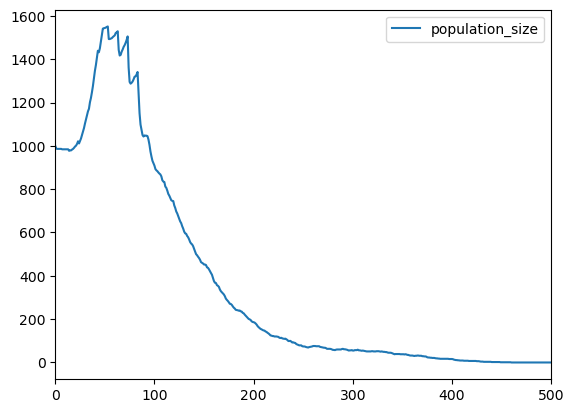

In [79]:
df_simulation['population_size'].plot(x='year', xlim=(0,500), legend=True)

In [52]:
data

,study,sex,age,marriage,money,age_dead,cause_dead
0,Ensino básico,F,1,True,0.000000,1,NATURAL
1,Ensino superior,F,1,False,0.000000,1,NATURAL
2,Ensino básico,M,1,False,0.000000,1,NATURAL
3,Ensino básico,F,1,True,0.000000,1,NATURAL
4,Ensino secundário e pós secundário,F,1,False,0.000000,1,NATURAL
...,...,...,...,...,...,...,...
17715,Nenhum,F,44,False,21285.756849,44,NATURAL
17716,Ensino básico,F,44,True,-87.006989,44,NATURAL
17717,Ensino superior,F,44,True,197986.583027,44,NATURAL
17718,Ensino básico,M,34,False,11070.401804,34,NATURAL


In [63]:
data.groupby('cause_dead').mean()

/tmp/ipykernel_17676/1492866482.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data.groupby('cause_dead').mean()


,age,marriage,money,age_dead,number_children
cause_dead,,,,,
CANT_PROVIDE_BASIC_NEEDS,44.454545,0.272727,38935.492858,76.727273,7.090909
NATURAL,71.927612,0.431991,111532.755012,71.927612,0.672504


In [66]:
data.groupby('cause_dead').count()

,study,sex,age,marriage,money,age_dead,number_children
cause_dead,,,,,,,
CANT_PROVIDE_BASIC_NEEDS,11,11,11,11,11,11,11
NATURAL,1713,1713,1713,1713,1713,1713,1713


In [65]:
data.number_children.value_counts()

0     1055
1      335
2      225
3       58
4       22
5       13
6        6
8        4
7        3
9        2
11       1
Name: number_children, dtype: int64

In [17]:
data[data['cause_dead']== 'CANT_PROVIDE_BASIC_NEEDS']

,study,sex,age,money,age_dead,cause_dead
55,Ensino básico,F,35,42954.317503,74,CANT_PROVIDE_BASIC_NEEDS
58,Ensino básico,F,38,27746.643615,74,CANT_PROVIDE_BASIC_NEEDS
63,Ensino básico,F,44,45363.505567,94,CANT_PROVIDE_BASIC_NEEDS
101,Nenhum,F,46,37482.736612,54,CANT_PROVIDE_BASIC_NEEDS
103,Nenhum,F,49,37303.054742,84,CANT_PROVIDE_BASIC_NEEDS
175,Ensino básico,F,58,39351.327313,84,CANT_PROVIDE_BASIC_NEEDS
590,Ensino básico,F,44,28611.565911,74,CANT_PROVIDE_BASIC_NEEDS
591,Ensino básico,F,52,28718.666043,74,CANT_PROVIDE_BASIC_NEEDS
597,Ensino básico,F,49,33522.163686,84,CANT_PROVIDE_BASIC_NEEDS
598,Ensino básico,F,49,45727.424493,64,CANT_PROVIDE_BASIC_NEEDS


In [7]:
data.groupby('study').mean()

/tmp/ipykernel_17676/2014343471.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data.groupby('study').mean()


,age,money,age_dead
study,,,
Ensino básico,71.822547,6942.431724,71.822547
Ensino secundário e pós secundário,74.594059,72467.814045,74.594059
Ensino superior,72.088398,545130.451513,72.088398
Nenhum,73.521739,7446.721189,73.521739


In [8]:
data.groupby('cause_dead').mean()

/tmp/ipykernel_17676/2469121441.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data.groupby('cause_dead').mean()


,age,money,age_dead
cause_dead,,,
NATURAL,72.665,117660.182481,72.665
